In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from helper import *

In [2]:
names = get_names()

names

['AAPL', 'BTC-USD', 'EURUSD=X', 'THB=X', 'GOOGL']

In [3]:
show_data_count = 2000


Train loss = 14.208902154580358
Full loss = 14.165367465347707
Test loss = 13.991228708417106 



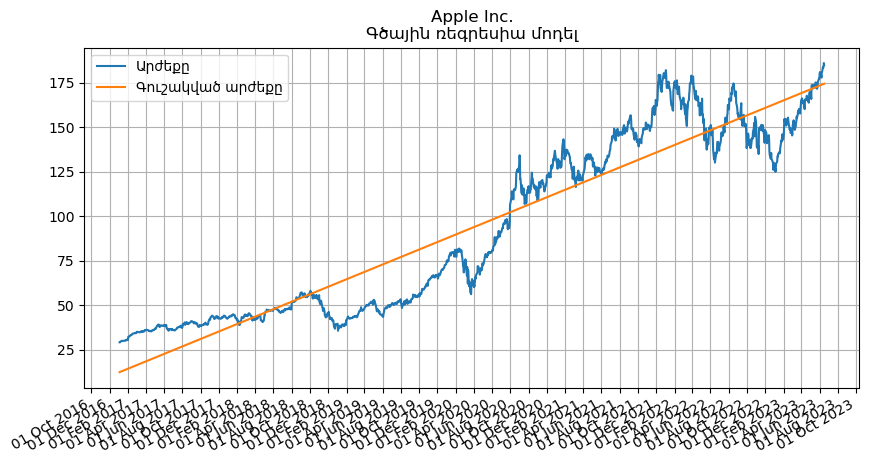


Train loss = 9153.839396944359
Full loss = 9126.069171203086
Test loss = 9015.047103462022 



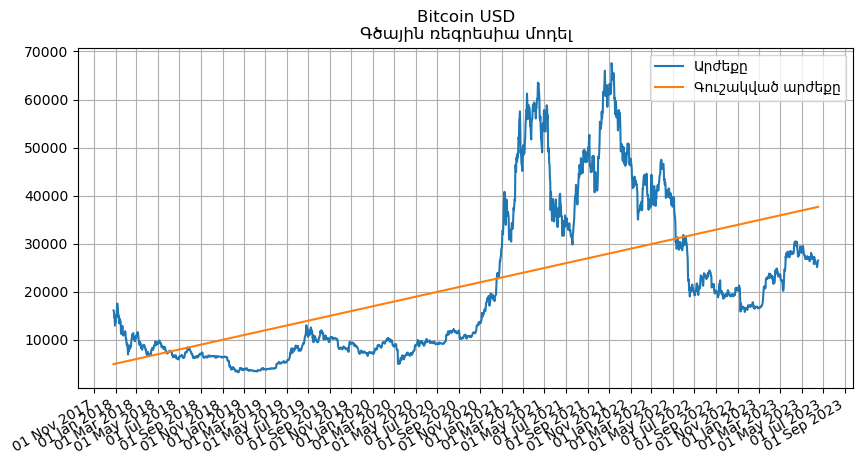


Train loss = 0.04311521265279345
Full loss = 0.04366862577504553
Test loss = 0.04587899391317994 



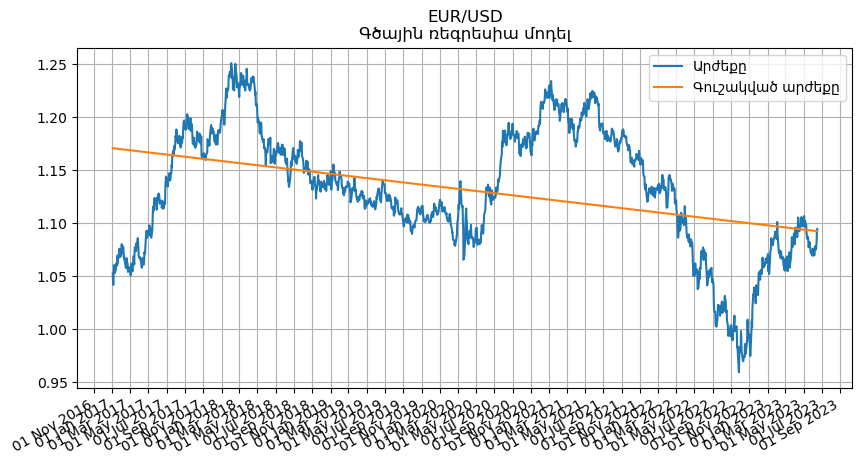


Train loss = 1.385861919395348
Full loss = 1.3895321333699675
Test loss = 1.4041912075831358 



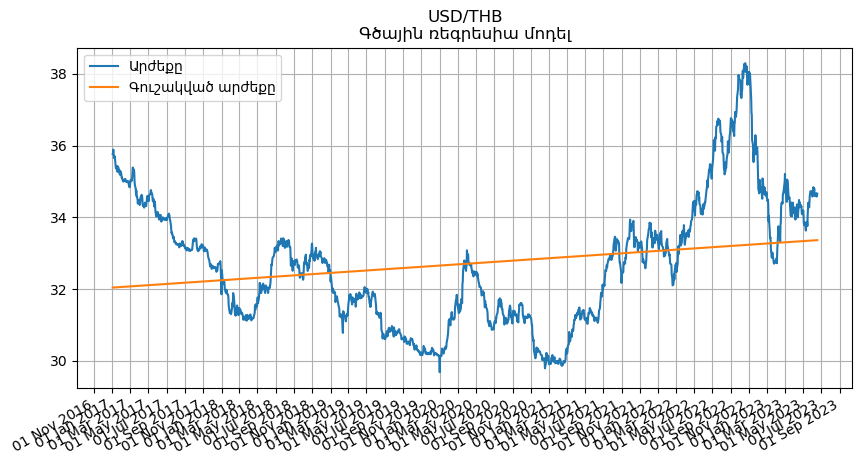


Train loss = 12.538248136775614
Full loss = 12.668801116596224
Test loss = 13.19101303587866 



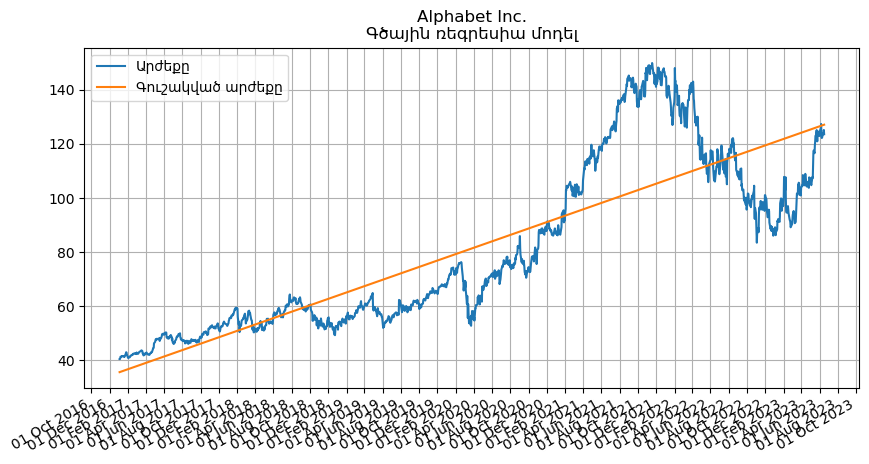

In [22]:
for symbol in names:
    data = pd.read_csv(f'./data/{symbol}.csv')
    
    Y = np.array(data['value'])
    dates = list(data['date'])

    X = np.array([date_to_timestamp(date) for date in dates]).reshape(-1, 1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, test_size=0.2)

    model = LinearRegression()
    model.fit(X_train, Y_train)
    print_loss(model.predict, X_test, Y_test, X_train, Y_train)

    graphics(
        Y, 
        model.predict(X), 
        dates, 
        x_count=show_data_count,
        title=f'{data["name"][0]}\nԳծային ռեգրեսիա մոդել',
        save=True,
        path=f'graphs/{symbol}/Linear_{show_data_count}.png'
    )

In [4]:
poly_features = PolynomialFeatures(degree = 5)


Train loss = 7.090539264312158
Full loss = 7.250750486777379
Test loss = 7.891595376638266 



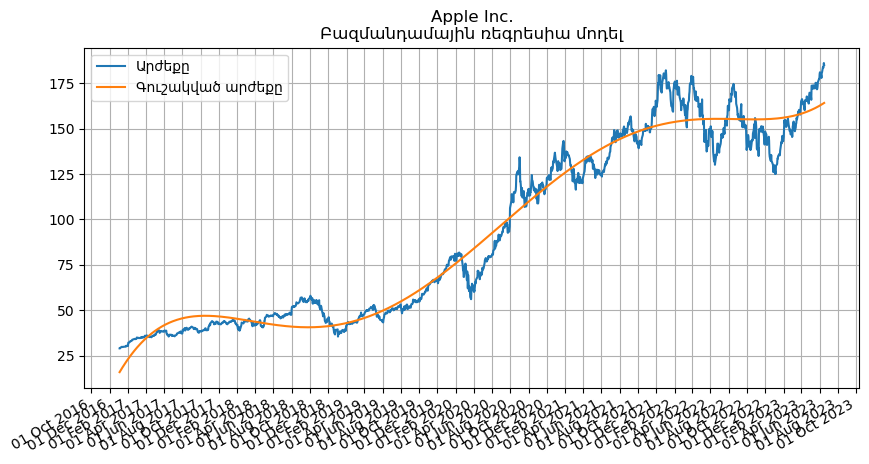


Train loss = 6576.1422028817005
Full loss = 6558.03943935134
Test loss = 6485.66673854246 



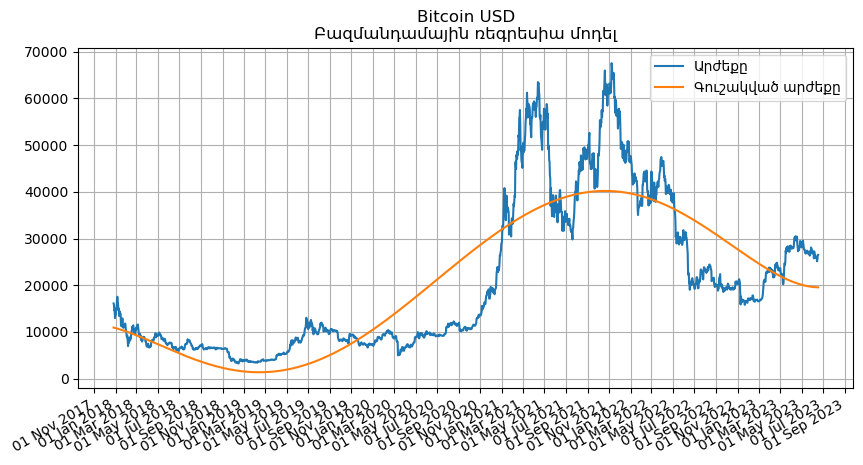


Train loss = 0.02314604845805783
Full loss = 0.02305701781319929
Test loss = 0.02270142360554472 



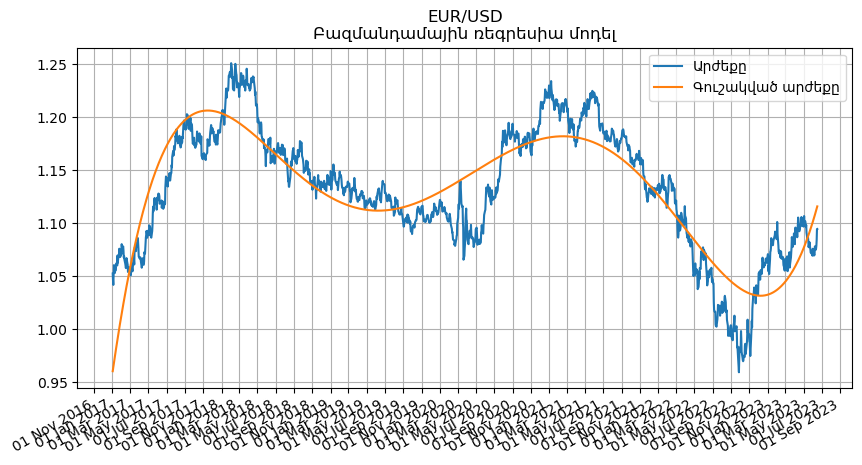


Train loss = 0.6617196193670668
Full loss = 0.6592274046714949
Test loss = 0.6492733364808718 



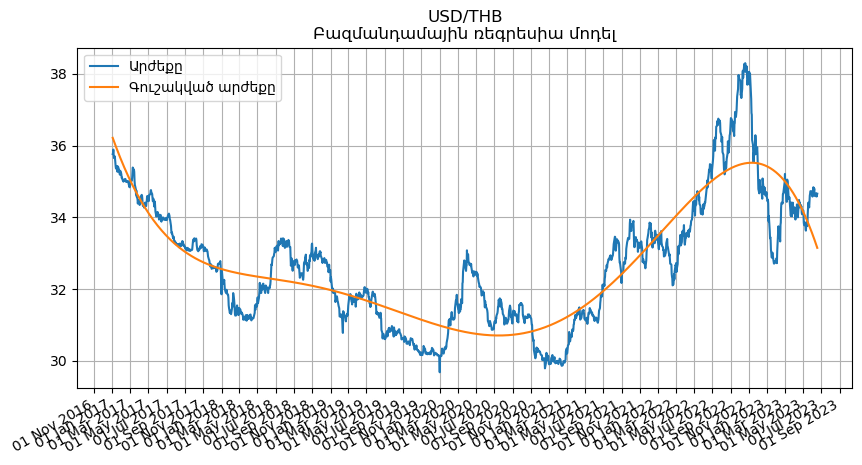


Train loss = 8.562820700544577
Full loss = 8.543174921246676
Test loss = 8.464591804055067 



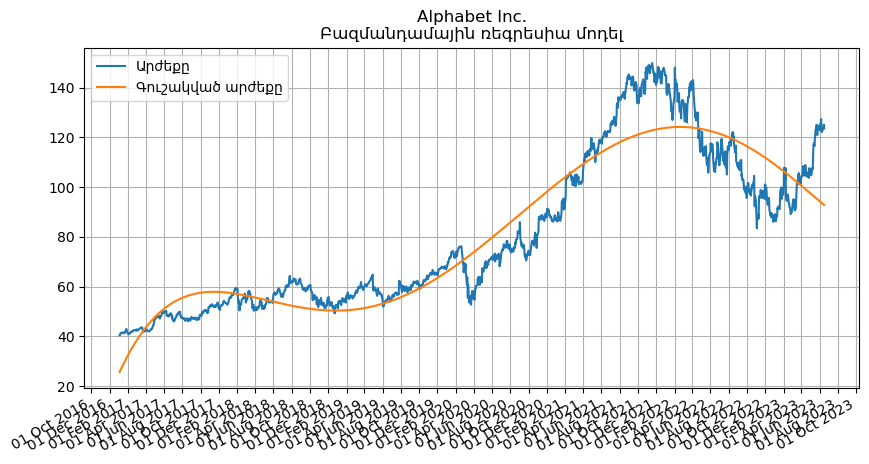

In [7]:
for symbol in names:
    data = pd.read_csv(f'./data/{symbol}.csv')
    
    Y = np.array(data['value'])
    dates = list(data['date'])

    X = np.array([date_to_timestamp(date) for date in dates]).reshape(-1, 1)

    X_poly = poly_features.fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, shuffle=True, test_size=0.2)

    model = LinearRegression()
    model.fit(X_train, Y_train)
    print_loss(model.predict, X_test, Y_test, X_train, Y_train)

    graphics(
        Y, 
        model.predict(X_poly), 
        dates, 
        x_count=show_data_count,
        title=f'{data["name"][0]}\nԲազմանդամային ռեգրեսիա մոդել',
        save=True,
        path=f'graphs/{symbol}/Polynomial_{show_data_count}.png'
    )